In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.util import ngrams 
from nltk.corpus import stopwords
import string

# read csv file
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# counts all the occurances of every bigram/2 word phrase for a list of reviews
# returns dictionary of bigrams with count of occruances within all the reviews
def bigramsCount(list_reviews):
    phrases_count = {}
    stop_words = set(stopwords.words('english'))

    # get the count of bigrams/2 word phrases
    for review in list_reviews:
        review = "".join([x for x in review if x not in string.punctuation])
        # remove stop words
        review = " ".join([word for word in str(review).split() if word not in stop_words])
        word = review.split()
        # get bigrams/2 word phrases
        bigrams = ngrams(word, 2)
        for p in bigrams:
            if p in phrases_count.keys():
                phrases_count[p] += 1
            else:
                # check for duplicate entry in reverse order
                reverse_p = p[::-1]
                if reverse_p in phrases_count.keys():
                    phrases_count[reverse_p] += 1
                else:
                    phrases_count[p] = 1
    return phrases_count

# return dataframe with most common bigram/2 wood phrases in list of reviews
def getCommonPhrases(list_reviews):
    # get count of 2 word phrases within each review
    phrases_count = bigramsCount(list_reviews)

    # remove phrases with less than 20 occurances in all reviews, not considered common
    phrases_count = {key:val for key, val in phrases_count.items() if val > 20}

    # put common phrases and counts into dataframe
    df_phrases_count = pd.DataFrame(phrases_count.items(), columns=['Phrase', 'Count'])
    df_phrases_count = df_phrases_count.sort_values(by='Count', ascending=False)

    return df_phrases_count

Text(0.5,1,'Number of Reviews Per Rating')

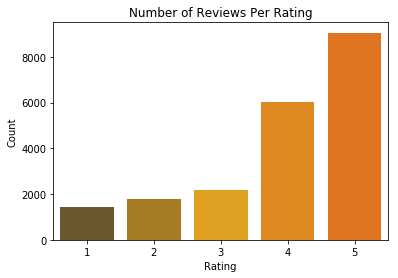

In [60]:
# -------------------------------------------------------------------------Q1
# get the # of reviews per rating
group_rating = df.groupby('Rating').size().reset_index()
group_rating.rename(columns = {0:'Count'}, inplace=True)

plot2 = sns.barplot("Rating", "Count", data=group_rating, palette="autumn_d")
plot2.set_title("Number of Reviews Per Rating")

Text(0.5,1,'10 Most Common Phases for Reviews with 5 Rating')

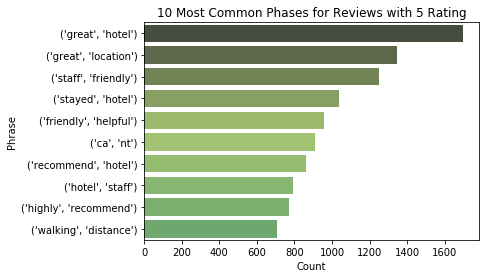

In [59]:
# -------------------------------------------------------------------------Q2
# for each rating, get the 10 most common phrases in their reviews

# get reviews with a 5 rating
five_rating_reviews = df[(df['Rating'] == 5)]
five_list_reviews = five_rating_reviews['Review'].tolist()
df_five_phrases = getCommonPhrases(five_list_reviews)

plotp5 = sns.barplot("Count", "Phrase", data=df_five_phrases.head(10), palette="summer_d")
plotp5.set_title("10 Most Common Phases for Reviews with 5 Rating")

Text(0.5,1,'10 Most Common Phases for Reviews with 4 Rating')

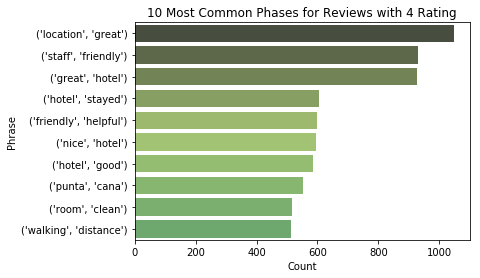

In [84]:
# get most common bigrams in reviews with a 4 rating
four_rating_reviews = df[(df['Rating'] == 4)]
four_list_reviews = four_rating_reviews['Review'].tolist()
df_four_phrases = getCommonPhrases(four_list_reviews)

plotp4 = sns.barplot("Count", "Phrase", data=df_four_phrases.head(10), palette="summer_d")
plotp4.set_title("10 Most Common Phases for Reviews with 4 Rating")

Text(0.5,1,'10 Most Common Phases for Reviews with 3 Rating')

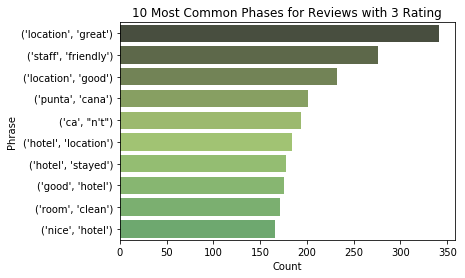

In [85]:
# get reviews with a 3 rating
three_rating_reviews = df[(df['Rating'] == 3)]
three_list_reviews = three_rating_reviews['Review'].tolist()
df_three_phrases = getCommonPhrases(three_list_reviews)

plotp3 = sns.barplot("Count", "Phrase", data=df_three_phrases.head(10), palette="summer_d")
plotp3.set_title("10 Most Common Phases for Reviews with 3 Rating")

Text(0.5,1,'10 Most Common Phases for Reviews with 2 Rating')

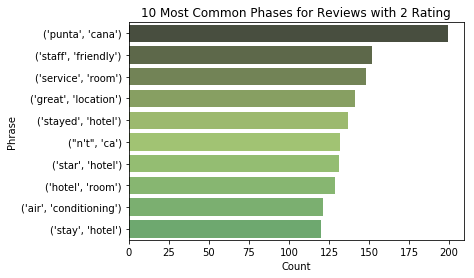

In [86]:
# get reviews with a 2 rating
two_rating_reviews = df[(df['Rating'] == 2)]
two_list_reviews = two_rating_reviews['Review'].tolist()
df_two_phrases = getCommonPhrases(two_list_reviews)

plotp2 = sns.barplot("Count", "Phrase", data=df_two_phrases.head(10), palette="summer_d")
plotp2.set_title("10 Most Common Phases for Reviews with 2 Rating")

Text(0.5,1,'10 Most Common Phases for Reviews with 1 Rating')

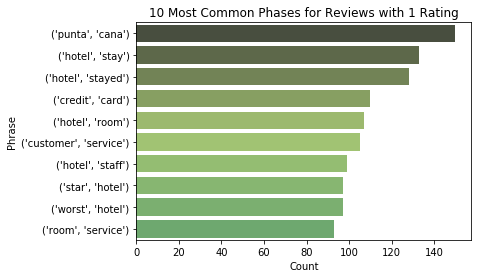

In [87]:
# get reviews with a 1 rating
one_rating_reviews = df[(df['Rating'] == 1)]
one_list_reviews = one_rating_reviews['Review'].tolist()
df_one_phrases = getCommonPhrases(one_list_reviews) 

plotp1 = sns.barplot("Count", "Phrase", data=df_one_phrases.head(10), palette="summer_d")
plotp1.set_title("10 Most Common Phases for Reviews with 1 Rating")

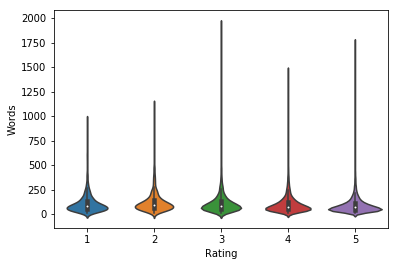

In [11]:
# -------------------------------------------------------------------------Q3
# get the length of each review (by words)
df['Words'] = [len(x.split()) for x in df['Review'].tolist()]
rating_length = df[['Rating', 'Words']]
sns.violinplot("Rating", "Words", data=rating_length)

In [62]:
# -------------------------------------------------------------------------Q4
# occurances of a specific word in reviews, most used words/phrases?

stop_words = set(stopwords.words('english'))
count_words = {}

for index, row in df.iterrows():
    # remove punctuation 
    row['Review'] = "".join([x for x in row['Review'] if x not in string.punctuation])
    # remove stop words
    row['Review'] = " ".join([word for word in str(row['Review']).split() if word not in stop_words])
    row['Review'] = row['Review'].split()
    for word in row['Review']:
        if word in count_words.keys():
            count_words[word] += 1
        else:
            count_words[word] = 1
    
count_words

{'nice': 12399,
 'hotel': 48832,
 'expensive': 1921,
 'parking': 1621,
 'got': 6185,
 'good': 16972,
 'deal': 1440,
 'stay': 15153,
 'anniversary': 410,
 'arrived': 2833,
 'late': 1569,
 'evening': 1852,
 'took': 2941,
 'advice': 502,
 'previous': 736,
 'reviews': 3738,
 'valet': 482,
 'check': 2927,
 'quick': 896,
 'easy': 2137,
 'little': 6242,
 'disappointed': 1204,
 'nonexistent': 65,
 'view': 4604,
 'room': 34300,
 'clean': 9359,
 'size': 1971,
 'bed': 4848,
 'comfortable': 4407,
 'woke': 131,
 'stiff': 27,
 'neck': 30,
 'high': 1694,
 'pillows': 652,
 'soundproof': 47,
 'like': 8112,
 'heard': 801,
 'music': 863,
 'night': 9423,
 'morning': 3136,
 'loud': 608,
 'bangs': 4,
 'doors': 660,
 'opening': 170,
 'closing': 105,
 'hear': 984,
 'people': 6758,
 'talking': 302,
 'hallway': 217,
 'maybe': 867,
 'noisy': 995,
 'neighbors': 77,
 'aveda': 72,
 'bath': 1134,
 'products': 200,
 'goldfish': 16,
 'touch': 664,
 'taken': 807,
 'advantage': 324,
 'staying': 2439,
 'longer': 425,
 'l